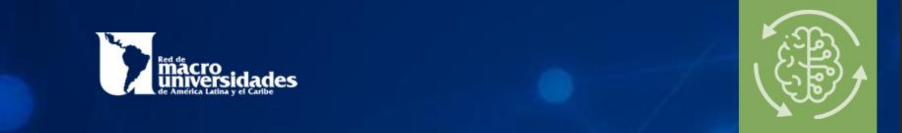


---
<center>

💻 **INTELIGENCIA ARTIFICIAL**

</center>


---

Israel Martinez

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Base de datos
fashion_mnist = keras.datasets.fashion_mnist

(train_inputs, train_labels), (test_inputs, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_inputs.shape

(60000, 28, 28)

In [ ]:
test_inputs.shape

(10000, 28, 28)

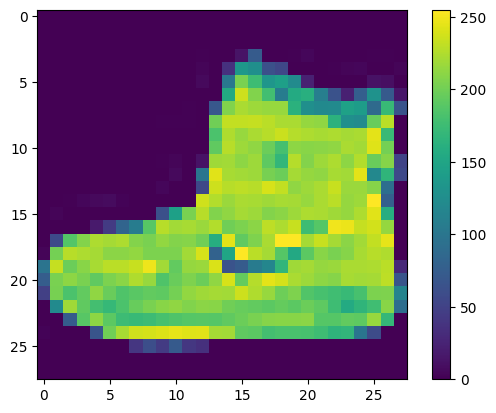

In [ ]:
plt.figure()
plt.imshow(train_inputs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalizacion
train_inputs = train_inputs / 255.0

test_inputs = test_inputs / 255.0

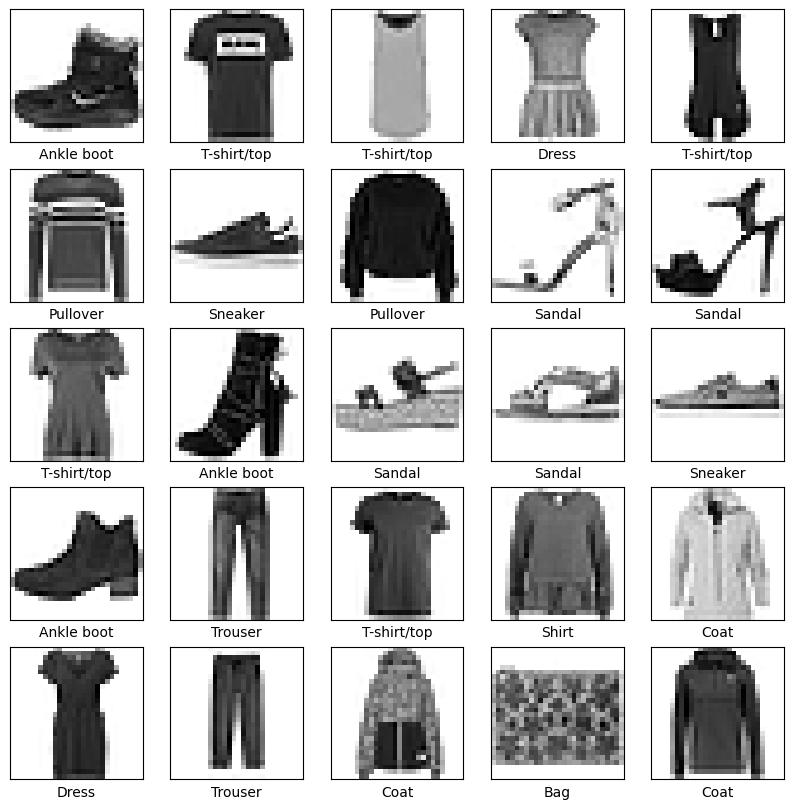

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
from keras import layers
input_img=keras.Input(shape=(28,28,1))

x=layers.Conv2D(64,(3,3), activation='relu', padding='same')(input_img)

x=layers.MaxPooling2D((2,2))(x)

x=layers.BatchNormalization()(x)

x=layers.Flatten()(x)

x=layers.Dense(100, activation='relu')(x)

clasif=layers.Dense(10, activation='sigmoid')(x)

In [ ]:
from tensorflow.keras import losses

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

clasificador= keras.Model(input_img, clasif)
clasificador.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
clasificador.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               125450

In [ ]:
history=clasificador.fit(train_inputs, train_labels,
                epochs=5,
                batch_size=100,
                shuffle=True,
                validation_data=(test_inputs, test_labels))

Epoch 1/5
600/600 [==============================] - 80s 129ms/step - loss: 0.3430 - accuracy: 0.8753 - val_loss: 0.3413 - val_accuracy: 0.8957
Epoch 2/5
600/600 [==============================] - 67s 111ms/step - loss: 0.2158 - accuracy: 0.9202 - val_loss: 0.2810 - val_accuracy: 0.8989
Epoch 3/5
600/600 [==============================] - 65s 108ms/step - loss: 0.1695 - accuracy: 0.9374 - val_loss: 0.2605 - val_accuracy: 0.9131
Epoch 4/5
600/600 [==============================] - 68s 114ms/step - loss: 0.1380 - accuracy: 0.9486 - val_loss: 0.3040 - val_accuracy: 0.9087
Epoch 5/5
600/600 [==============================] - 66s 110ms/step - loss: 0.1131 - accuracy: 0.9580 - val_loss: 0.3053 - val_accuracy: 0.9127


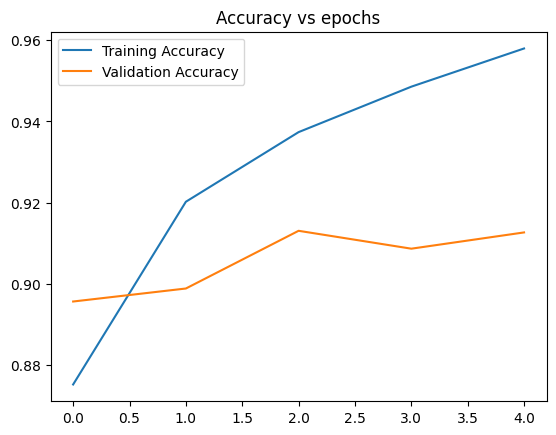

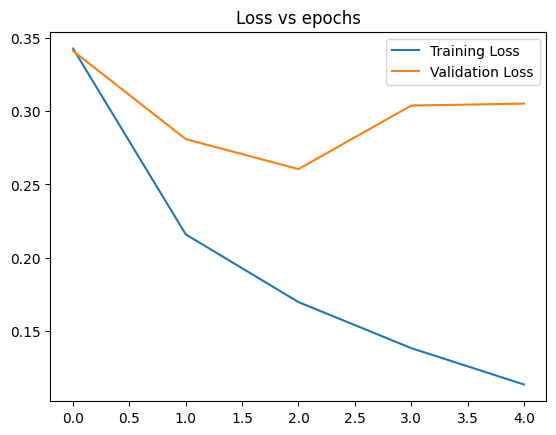

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
predictions = clasificador.predict(test_inputs)

313/313 [==============================] - 3s 10ms/step


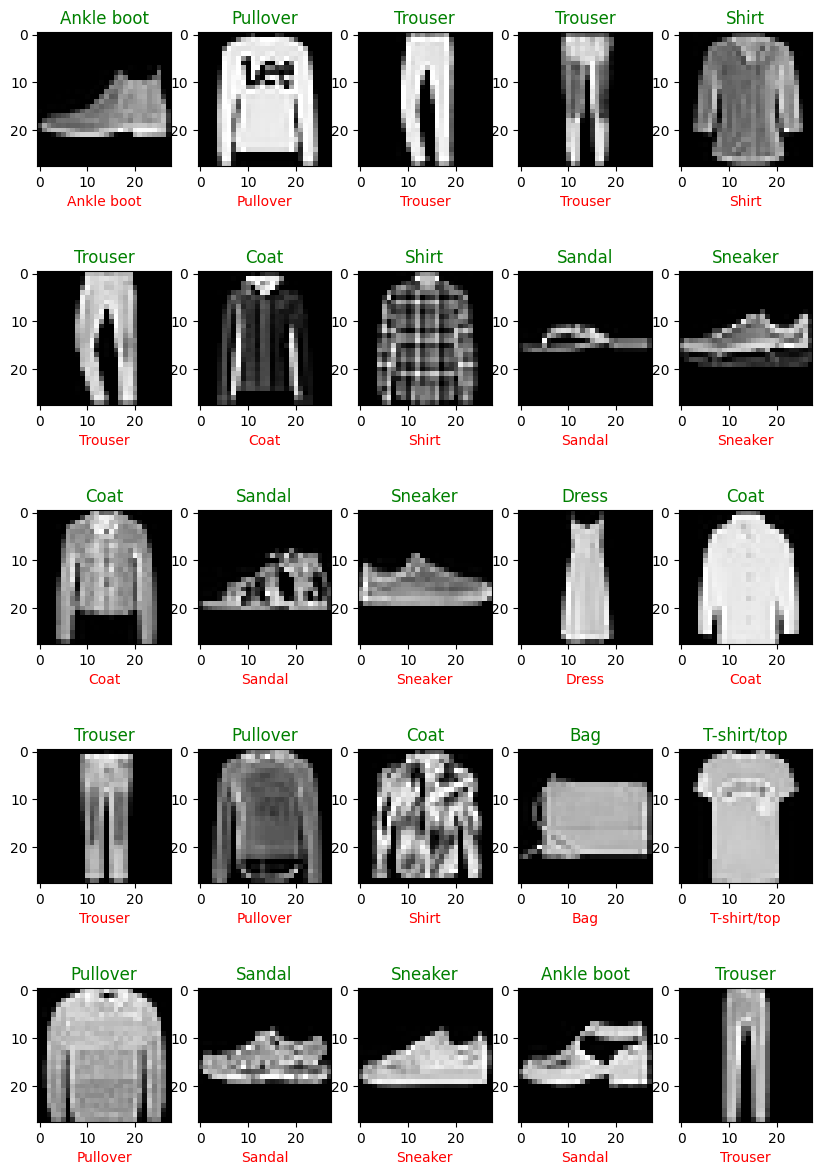

In [ ]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)

    plt.imshow(test_inputs[i].reshape(28,28), 'gray')
    plt.title(class_names[test_labels[i]], color='g')
    plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

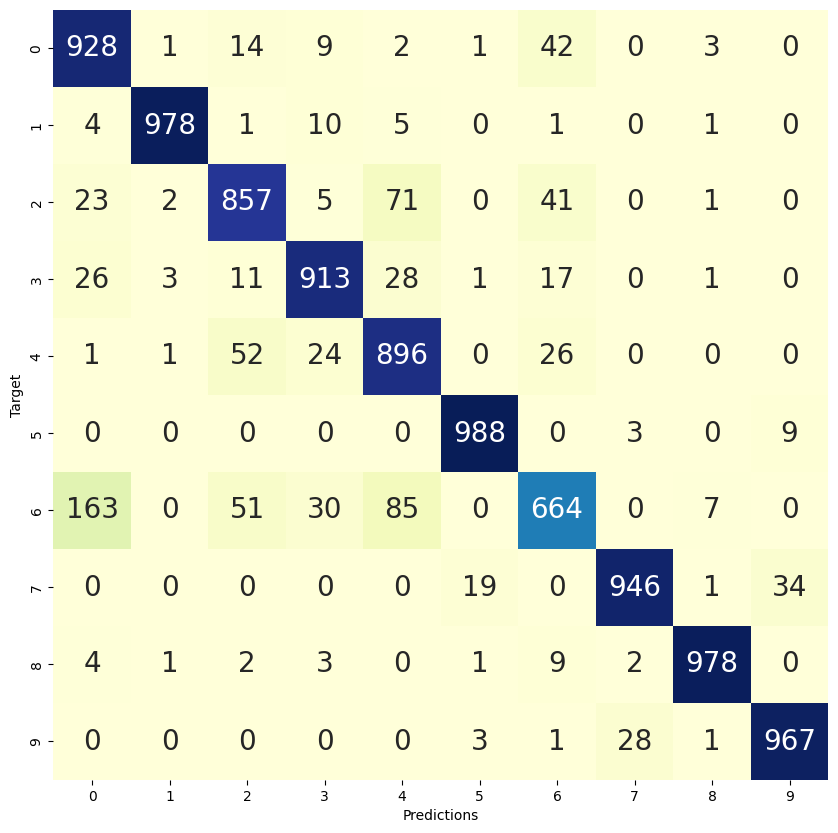

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');